In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# remove warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the data
myd = pd.read_csv("/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")

# Display the first 5 rows of the data
myd.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
# Check for missing values
print(myd.isnull().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


# Exploratory Analysis

### Examining the data for distribution and ranges of likert scale variables.

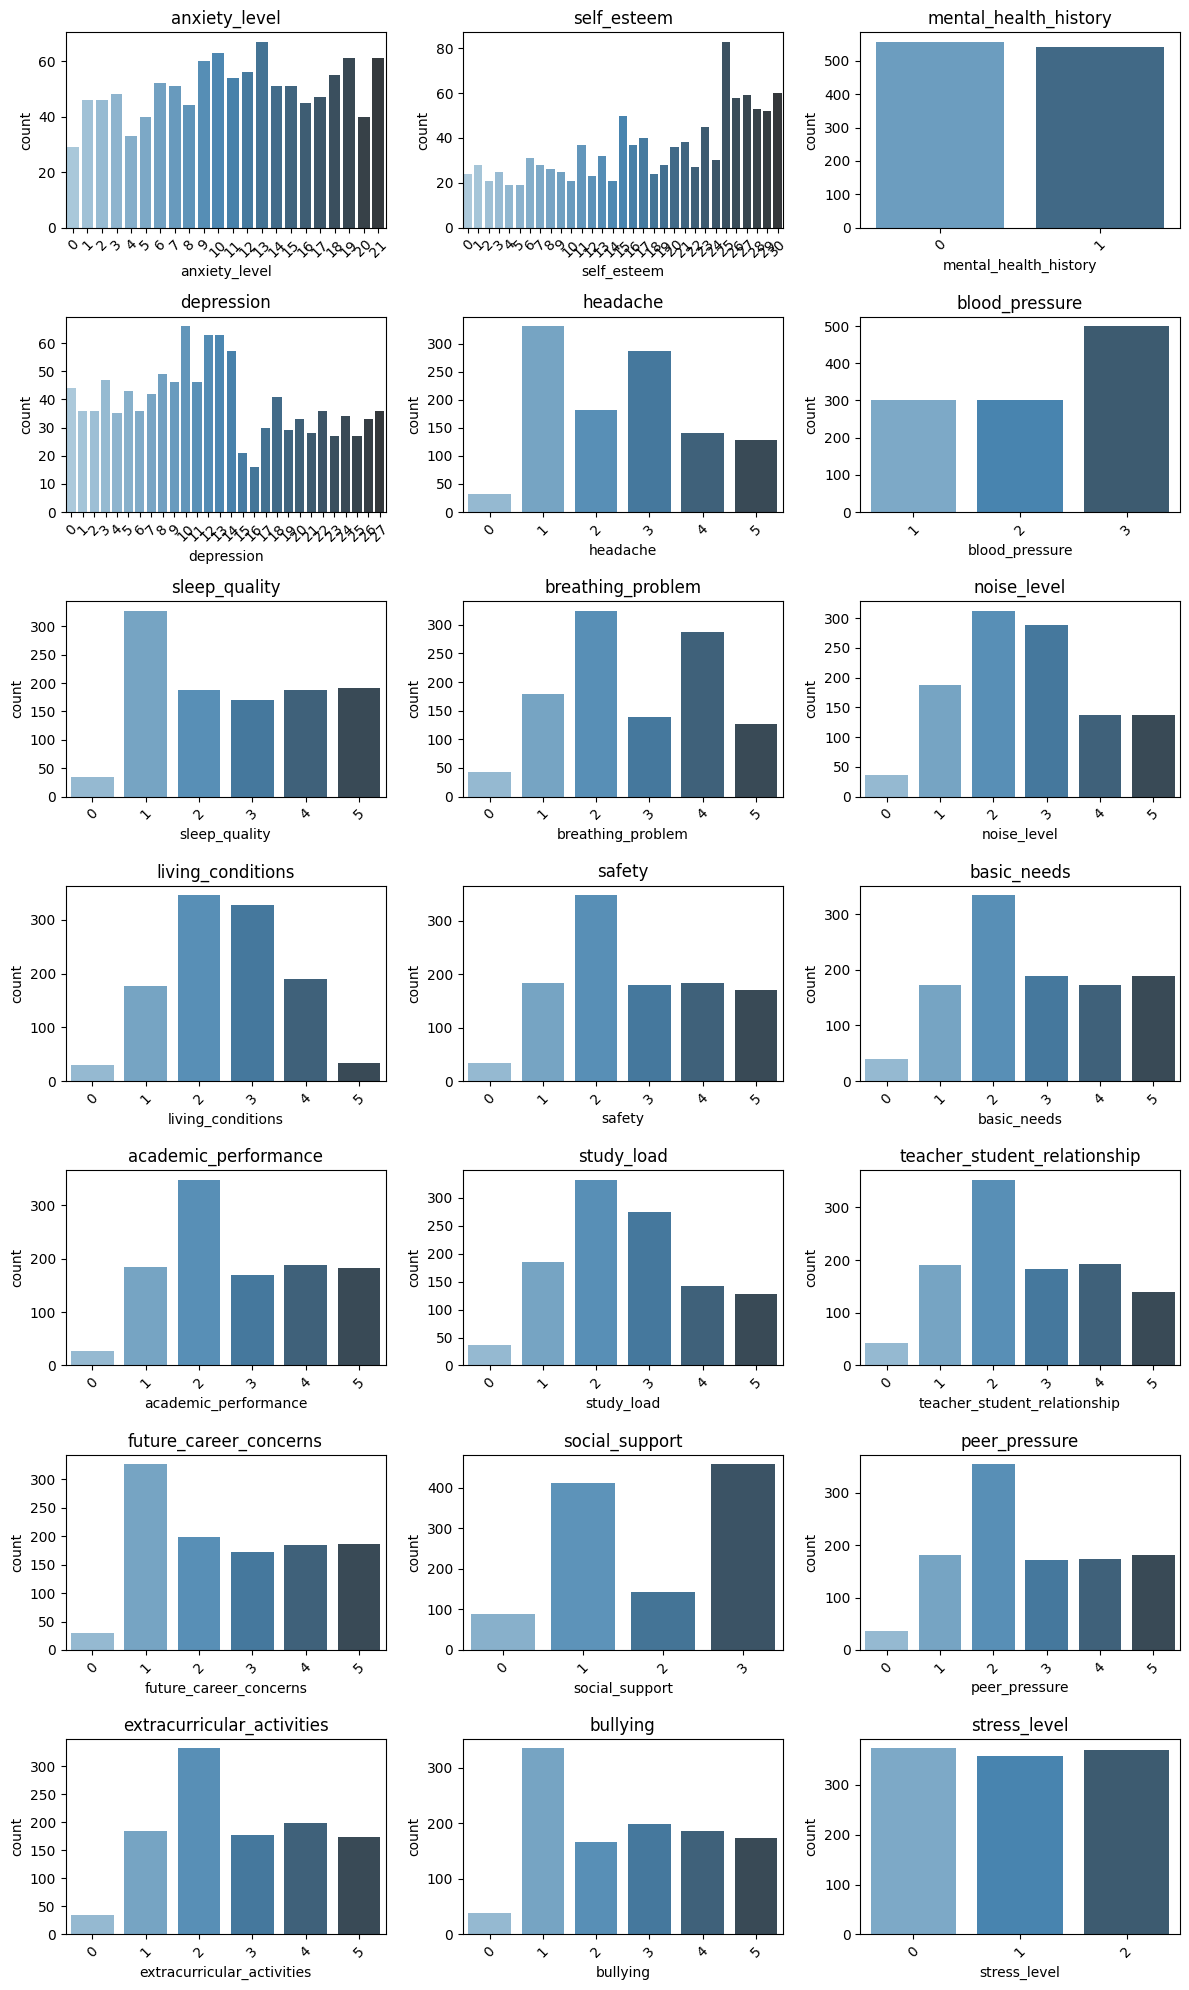

In [4]:
# Bar charts for all columns
plt.figure(figsize=(12, 20)) 

for i, column in enumerate(myd.columns, 1):
    plt.subplot(7, 3, i)
    sns.countplot(x=column, data=myd, palette='Blues_d')
    plt.xticks(rotation=45)
    plt.title(column)

plt.tight_layout()
plt.show()


- Target variables stress level seems to have a uniform distribution

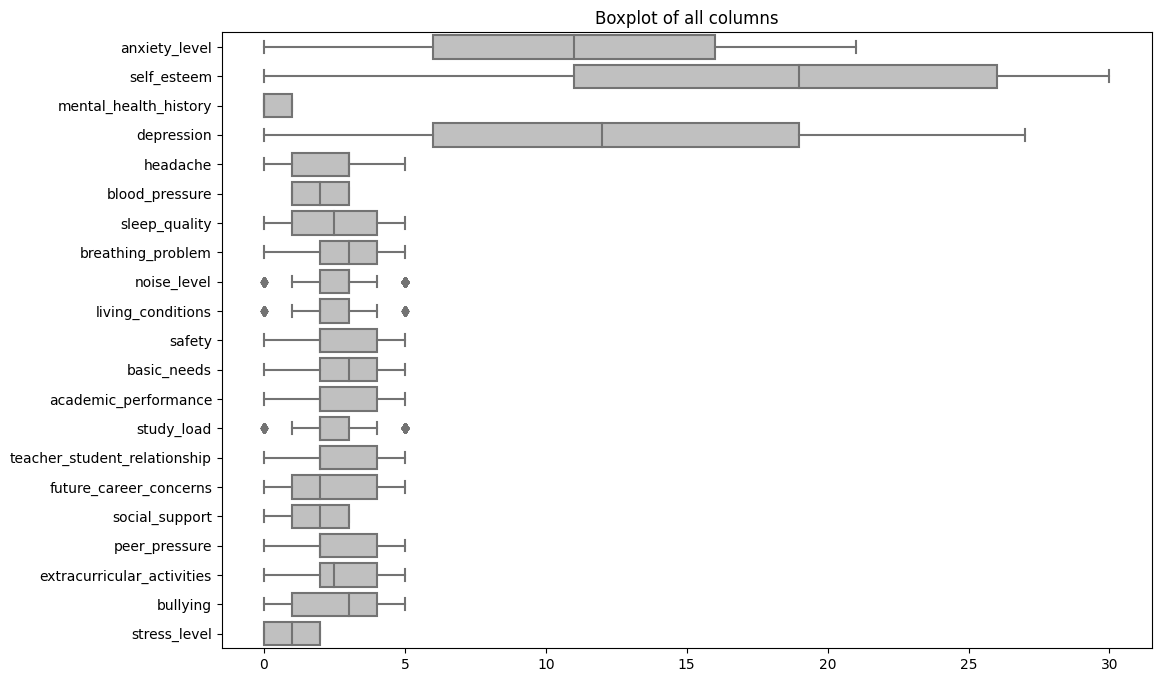

In [5]:
# Box plots for all columns

plt.figure(figsize= (12,8))
sns.boxplot(data=myd, orient='h', color='silver')
plt.title('Boxplot of all columns')
plt.show()

- Most variables are ona scale of 1-5
- Anxiety, self esteem, depressioon have larger range so keep in mind when furthur EDA
- Mental helath history binary
- Blood pressure scale 1-3
- Target variable stress level is on a scale 1-3

In [6]:
# Percentage of students with mental health history
mental_health_history = myd['mental_health_history'].value_counts(normalize=True) * 100
print('Percentage of students with mental health history:', mental_health_history[1])


Percentage of students with mental health history: 49.27272727272727


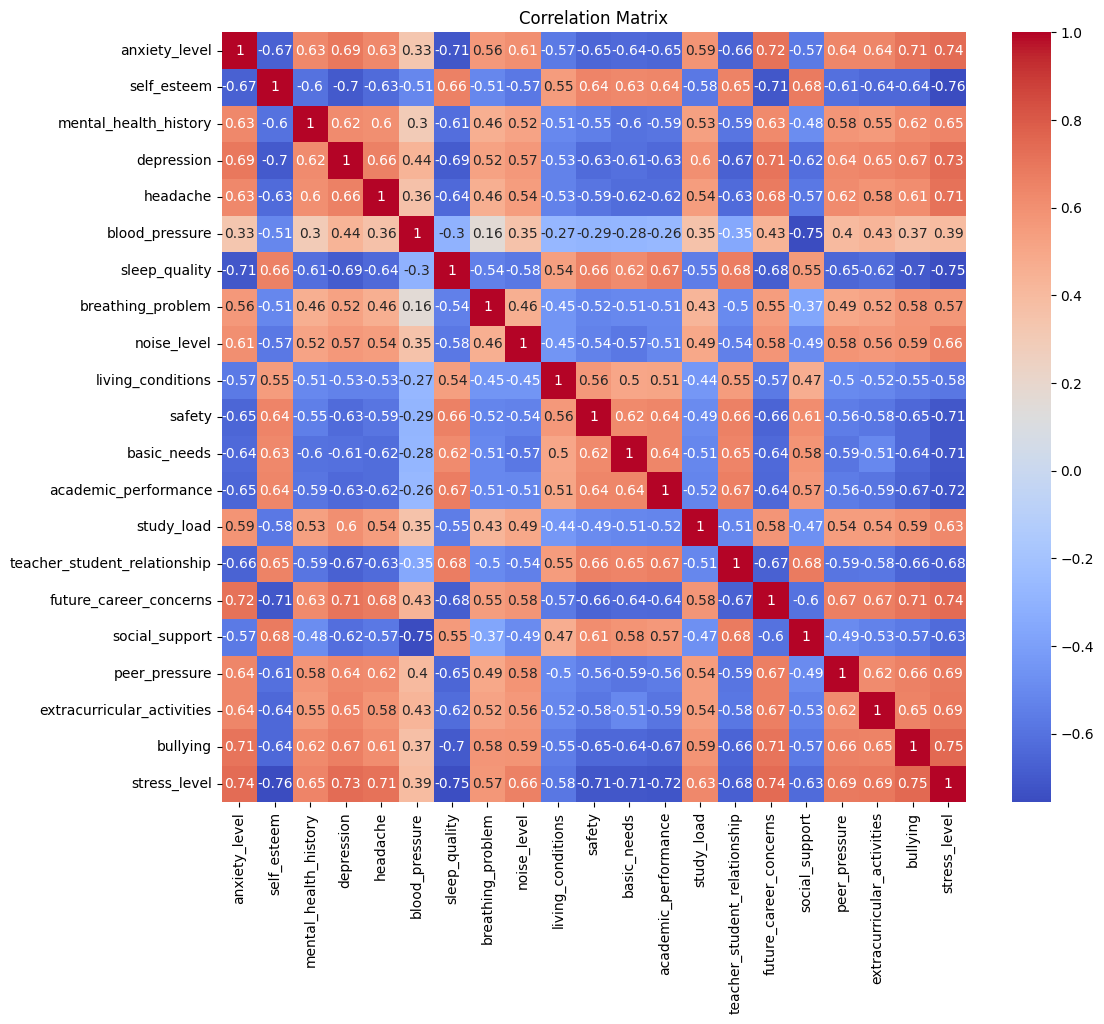

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(myd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Target variable analysis

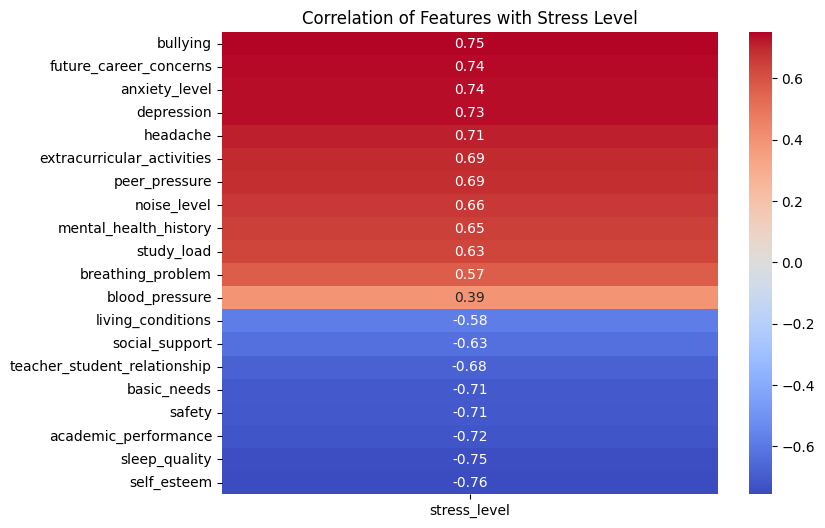

In [8]:
# Correlation heat map only stress level 
correlation = myd.corr()
correlation_stress = correlation['stress_level'].sort_values(ascending=False)
correlation_stress = correlation_stress.drop('stress_level')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_stress.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Stress Level')
plt.show()

In [9]:
# Average score for each stress level
average_stress = myd.groupby('stress_level').mean()
average_stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
stress_level,,,,,,,,,,,,,,,,,,,,
0,5.431635,25.252011,0.101877,6.013405,1.313673,2.195710,4.126005,1.697051,1.648794,3.313673,4.099196,4.144772,4.142091,1.654155,3.927614,1.335121,2.541555,1.675603,1.715818,1.254692
1,11.430168,19.262570,0.488827,11.874302,2.460894,1.324022,2.530726,2.927374,2.511173,2.502793,2.416201,2.477654,2.491620,2.533520,2.357542,2.522346,2.178771,2.458101,2.480447,2.555866
2,16.401084,8.780488,0.891599,19.829268,3.761518,3.000000,1.303523,3.653117,3.794038,1.728997,1.672087,1.672087,1.661247,3.685637,1.636856,4.100271,0.926829,4.073171,4.108401,4.054201


Average Stress Level: 0.9963636363636363


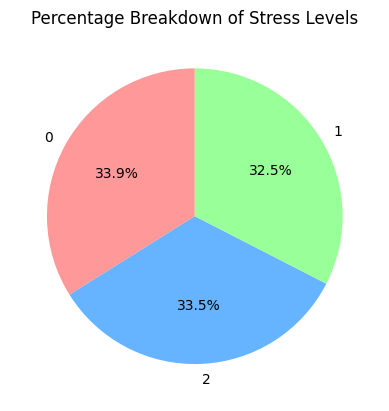

In [10]:
# Average stress level
average_stress_level = myd['stress_level'].mean()
print('Average Stress Level:', average_stress_level)

# Percentage breakdown of stress levels pie chart
myd['stress_level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Percentage Breakdown of Stress Levels')
plt.ylabel('')
plt.show() 

In [11]:
# Split the data into features and target
X = myd.drop('stress_level', axis=1)
y = myd['stress_level']

In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA and Factor Analysis

Using more so for latent variable discovery as compared to dimensionality reduction.


### Assessing suitability of the data for PCA and factor analysis

In [13]:
# KMO Test
#from factor_analyzer.factor_analyzer import calculate_kmo
#kmo_all, kmo_model = calculate_kmo(X_scaled)

#print(kmo_all)
#print(kmo_model)


In [14]:
# Bartlett's Test 
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)

#print("Chi-square value:", chi_square_value)
#print("p-value:", p_value)

### How many components to use?

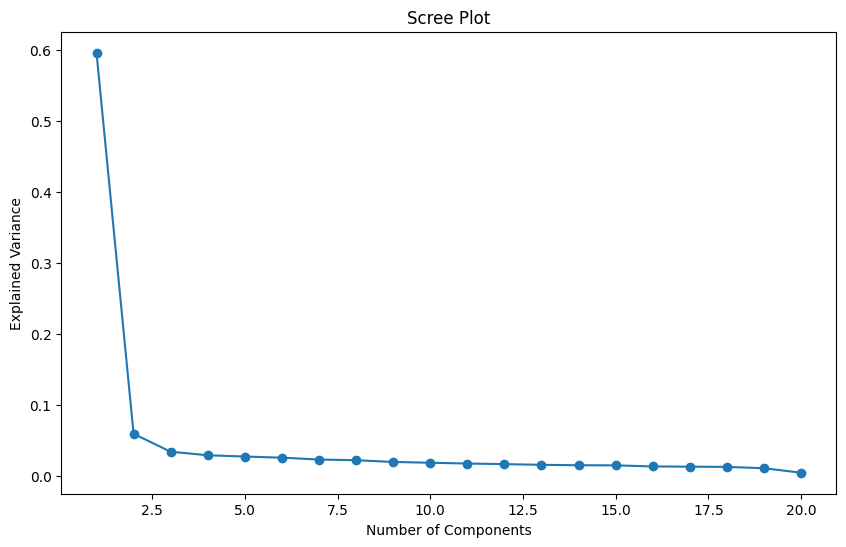

In [15]:
# PCA

# Scree plot
pca = PCA()
pca.fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

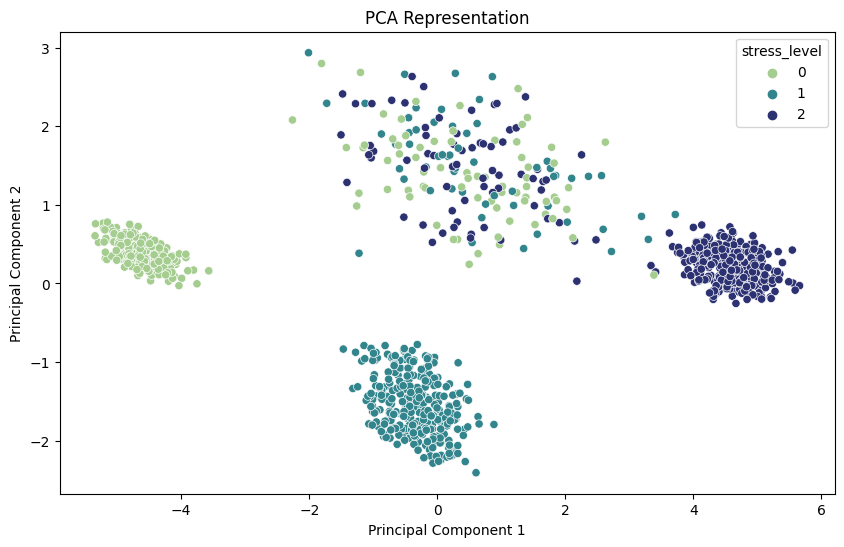

In [16]:
# 2 components explain most of the variance

# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA representation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='crest') #cividis
plt.title('PCA Representation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [17]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Total variance explained
total_variance_explained = np.sum(explained_variance_ratio)
print("Total Variance Explained:", total_variance_explained)

Explained Variance Ratio: [0.59556883 0.05980716]
Total Variance Explained: 0.6553759937099781


In [18]:
# Access loading coefficients for all variables
loadings = pca.components_

# DataFrame to display loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=X.columns)

print("Loadings for all variables in relation to Principal Components:")
print(loadings_df)

Loadings for all variables in relation to Principal Components:
                                   PC1       PC2
anxiety_level                 0.244210 -0.111349
self_esteem                  -0.242044 -0.150285
mental_health_history         0.218941 -0.117580
depression                    0.242709  0.043398
headache                      0.229389 -0.013055
blood_pressure                0.145111  0.744280
sleep_quality                -0.240323  0.134881
breathing_problem             0.189994 -0.299649
noise_level                   0.208863 -0.015526
living_conditions            -0.198625  0.095697
safety                       -0.229310  0.084511
basic_needs                  -0.226792  0.106431
academic_performance         -0.229500  0.136195
study_load                    0.204304  0.004565
teacher_student_relationship -0.236666 -0.000619
future_career_concerns        0.247480  0.008155
social_support               -0.217857 -0.480620
peer_pressure                 0.226360 -0.025218
extra

In [19]:
# Correlation Loadings between original variables and principal components
correlation_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
correlation_loadings_df = pd.DataFrame(correlation_loadings, columns=['PC1', 'PC2'], index=X.columns)


# cutoff threshold for correlation loadings
cutoff = 0.5  

# Filtering the data frame to only include values above cutoff
significant_correlation_loadings_df = correlation_loadings_df.where(
    lambda x: abs(x) > cutoff).dropna(how='all').fillna('')

print("Significant Correlation Loadings for all variables in relation to Principal Components:")
print(significant_correlation_loadings_df)


Significant Correlation Loadings for all variables in relation to Principal Components:
                                   PC1       PC2
anxiety_level                 0.843223          
self_esteem                  -0.835742          
mental_health_history         0.755971          
depression                    0.838038          
headache                      0.792047          
blood_pressure                0.501046  0.814376
sleep_quality                -0.829801          
breathing_problem             0.656022          
noise_level                   0.721175          
living_conditions            -0.685823          
safety                       -0.791775          
basic_needs                  -0.783082          
academic_performance         -0.792432          
study_load                    0.705434          
teacher_student_relationship -0.817175          
future_career_concerns        0.854514          
social_support               -0.752228 -0.525886
peer_pressure                 

In [20]:
# FA
# from factor_analyzer import FactorAnalyzer

# # Create factor analysis object and perform factor analysis
# fa = FactorAnalyzer(rotation='varimax', n_factors=2)
# fa.fit(X_scaled)

# # Get the factor loadings
# loadings = fa.loadings_

# # Create a DataFrame to display loadings
# loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2'], index=X.columns)

# # cutoff threshold for correlations
# cutoff = 0.5

# # Filter the DataFrame to only include values above or below the cutoff
# significant_loadings_df = loadings_df.where(
#     lambda x: abs(x) > cutoff).dropna(how='all').fillna('')
# print("Significant Loadings for all variables in relation to Factors:")
# print(significant_loadings_df)

Observations
- Focused on using PCA more so for latent varuable discovery as compared to dimensionality reduction.
    - So can accept lower cumalative explained variance.
    - Will focus on examinig the correlation loadings more so than the variance.
- PCA with two components determined by elbow only led to %65 explained variance.
- Most variables had the highest correlation with the first PC except blood pressure that had the highest correlation with PC2.
- FA gave simialr results except the second factor also had a higher correlation with social support and not only blood pressure.


# Cluster Analysis

### How many clusters to use? 
Will use these methods as starting points and experiment to see if get better results with a different number of clusters

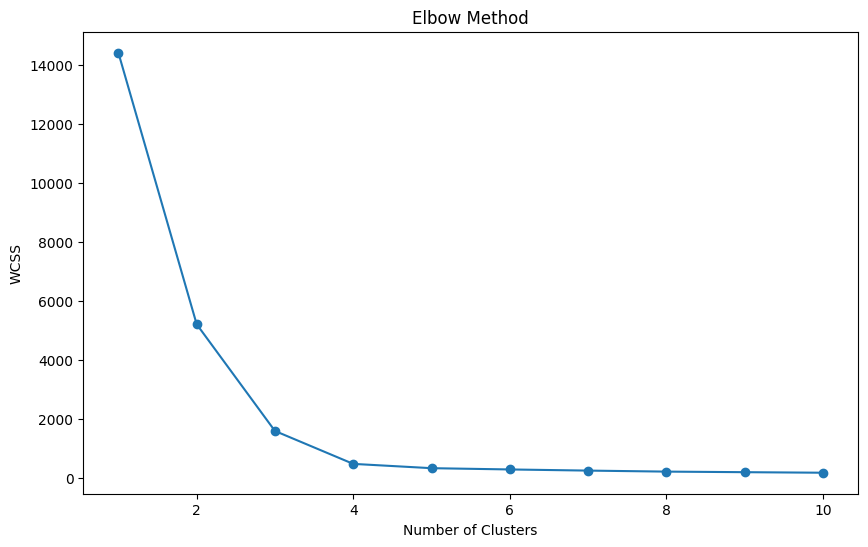

In [21]:
# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

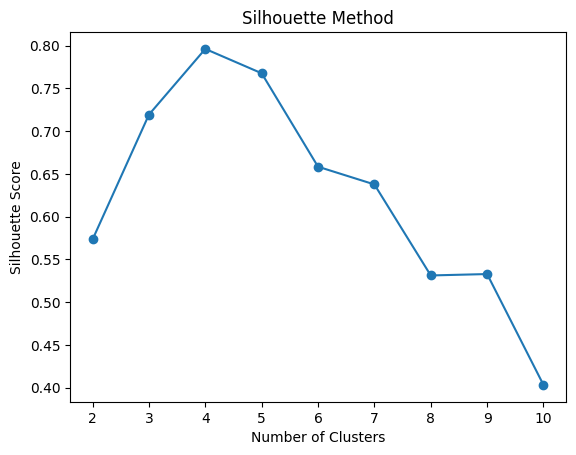

Optimal number of clusters: 4


In [22]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store silhouette scores for different numbers of clusters
silhouette_scores = []

# Specify the range of clusters to try
max_clusters = 10
for n_clusters in range(2, max_clusters + 1):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because we started from 2 clusters
print("Optimal number of clusters:", optimal_num_clusters)

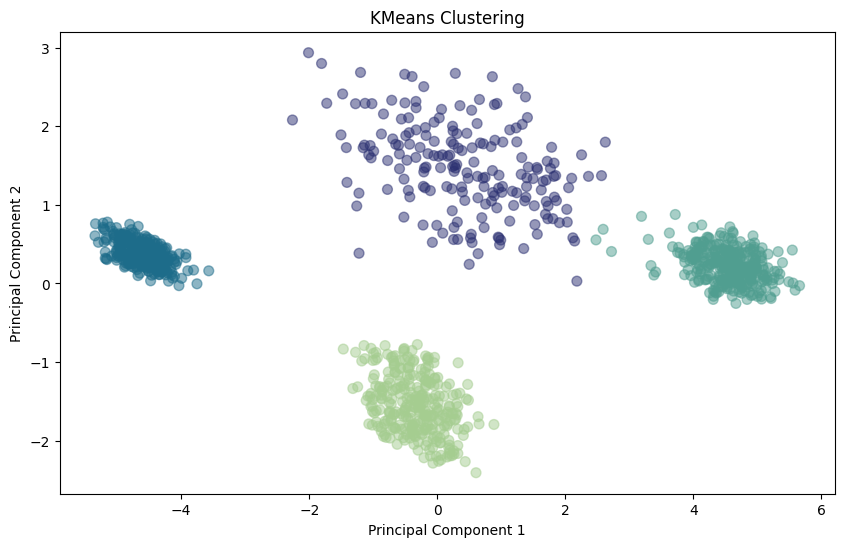

In [23]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Add cluster labels to the new DataFrame
clustered_data = myd.copy()
clustered_data['cluster'] = cluster_labels


# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='crest', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [24]:
# Examine the clusters means
clustered_data.groupby('cluster').mean()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
cluster,,,,,,,,,,,,,,,,,,,,,
0,11.410000,19.980000,0.513333,11.640000,2.483333,1.0,2.456667,3.026667,2.523333,2.483333,...,2.513333,2.473333,2.486667,2.483333,2.460000,2.526667,2.466667,2.483333,2.560000,1.000000
1,17.948052,7.899351,0.996753,21.305195,3.935065,3.0,0.996753,3.951299,4.009740,1.525974,...,1.522727,1.500000,3.957792,1.470779,4.470779,0.987013,4.490260,4.422078,4.431818,1.977273
2,4.190000,27.430000,0.000000,4.096667,1.000000,2.0,4.486667,1.513333,1.470000,3.526667,...,4.520000,4.506667,1.490000,4.466667,1.000000,3.000000,1.523333,1.490000,1.000000,0.000000
3,10.218750,15.098958,0.421875,13.166667,2.614583,3.0,2.791667,2.343750,2.505208,2.588542,...,2.453125,2.572917,2.458333,1.953125,2.598958,0.562500,2.229167,2.552083,2.322917,0.973958


In [25]:
# cluster size
cluster_sizes = clustered_data['cluster'].value_counts()
cluster_sizes

cluster
1    308
0    300
2    300
3    192
Name: count, dtype: int64

In [26]:

pd.crosstab(clustered_data['cluster'], clustered_data['stress_level'], normalize='index')


stress_level,0,1,2
cluster,,,
0,0.000000,1.000000,0.000000
1,0.003247,0.016234,0.980519
2,1.000000,0.000000,0.000000
3,0.375000,0.276042,0.348958


- Cluster 1 has the highest average stress level and worst averages for most varaibles.
- Cluster 2 on the other hand has an average of 0 stress level and contains those with positive average scores for most variables, notably an average of 4.5/5 for sleep quality, basic needs and academic performance as well as no prior mental health issues.

# Predictive Models

In [27]:
# Decision Tree Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        76
           1       0.87      0.90      0.89        73
           2       0.88      0.86      0.87        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [28]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.89      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



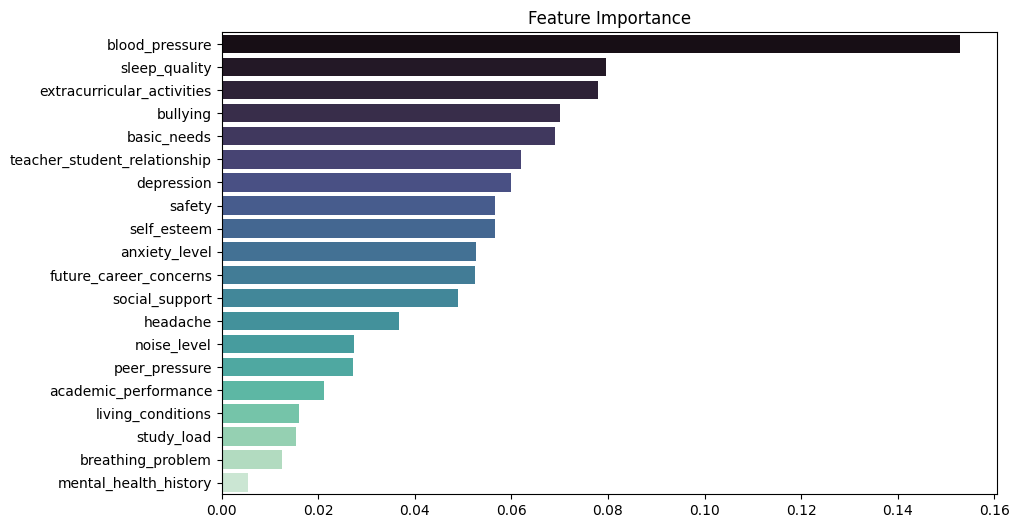

In [29]:
# Plot feature importance
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='mako')
plt.title('Feature Importance')
plt.show()



In [30]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
best_rf = grid_search.best_estimator_

print(best_rf)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.8999791042696943
RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)


In [31]:
# Evaluate the best model
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.89      0.85      0.87        73
           2       0.93      0.89      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



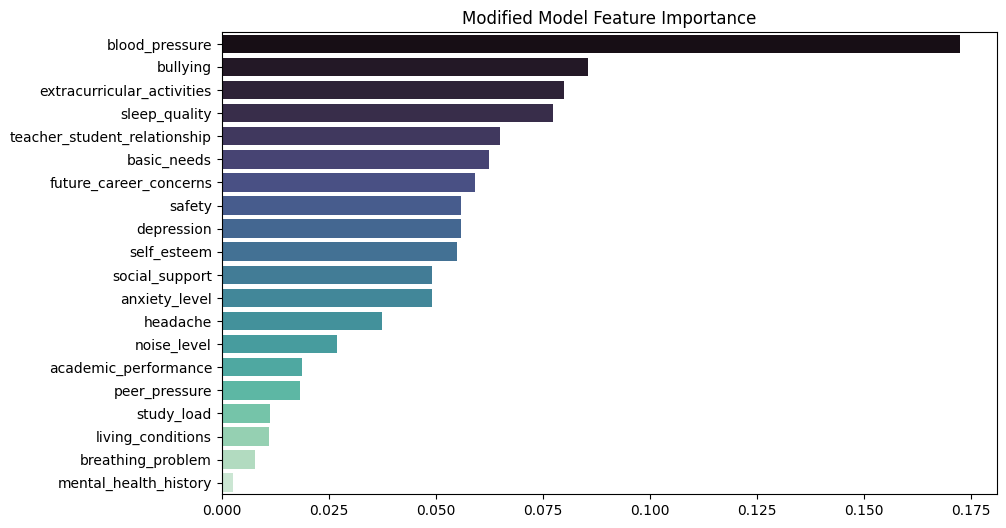

In [32]:
# Feature Importance plot
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='mako')
plt.title('Modified Model Feature Importance')
plt.show()

In [33]:
# ordinal regression
# import mord as m

# # Split the data into features and target
# X = myd.drop('stress_level', axis=1)
# y = myd['stress_level']

# # Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Fit the OrdinalRidge regression model
# or_model = m.OrdinalRidge()
# or_model.fit(X_train, y_train)

# # Predict the stress level
# y_pred = or_model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

